# Regression spotting project

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import sklearn.model_selection
from matplotlib import pyplot as plt
plt.style.use('dark_background')

from sklearn.preprocessing import StandardScaler
import umap.plot


In [2]:
# Paths:
input_dir = Path.cwd() / "../input_data"
plots_dir = Path.cwd() / "../plots"
plots_dir.mkdir(exist_ok=True)

## Loading data
Loading fingerprints, and molecule properties


In [3]:
# Load fingerprints:
fingerprints = pd.read_csv(input_dir / "fingerprints.csv", index_col=0)
fingerprints.sort_index(inplace=True)
# There seems to be some duplicates in the rows:
fingerprints.drop_duplicates(inplace=True)
# Save columns names:
fingerprints_cols = fingerprints.columns

fingerprints
# fingerprints.addu

,1,8,13,26,27,31,35,41,45,62,...,1977,1991,1992,1995,2001,2004,2018,2034,2038,2044
mol_name,,,,,,,,,,,,,,,,,,,,,
2-Oxoglutaric acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Hydroxyanthranilic acid,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3-Hydroxymethylglutaric acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Phosphoglyceric acid,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"4,5-Dihydroorotic acid",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
alpha-tocopherol,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cis-Aconitic acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Load properties:
mol_properties = pd.read_csv(input_dir / "physchem_properties.csv", index_col=0)
mol_properties.sort_index(inplace=True)
mol_properties.drop_duplicates(inplace=True)
# mol_properties.set_index("name_short", inplace=True)
mol_properties_cols = mol_properties.columns
mol_properties

,pka_strongest_acidic,pka_strongest_basic,polar_surface_area,polarizability,acceptor_count,donor_count,physiological_charge
name_short,,,,,,,
2-Oxoglutaric acid,2.66,-9.70,91.67,12.17,5.0,2.0,-2.0
3-Hydroxyanthranilic acid,1.94,4.82,83.55,14.18,4.0,3.0,-1.0
3-Hydroxymethylglutaric acid,3.68,-3.00,94.83,14.55,5.0,3.0,-2.0
3-Phosphoglyceric acid,1.30,-4.20,124.29,13.29,6.0,4.0,-3.0
"4,5-Dihydroorotic acid",3.28,-8.20,95.50,13.09,4.0,3.0,-1.0
...,...,...,...,...,...,...,...
Xanthine,7.95,-0.70,86.88,12.70,3.0,3.0,0.0
alpha-tocopherol,10.80,-4.90,29.46,55.29,2.0,1.0,0.0
cis-Aconitic acid,2.11,NaN,111.90,14.16,6.0,3.0,-3.0


Check statistics of molecular properties and handle NaN values:


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/1539120124.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  mol_properties.hist(ax=ax)


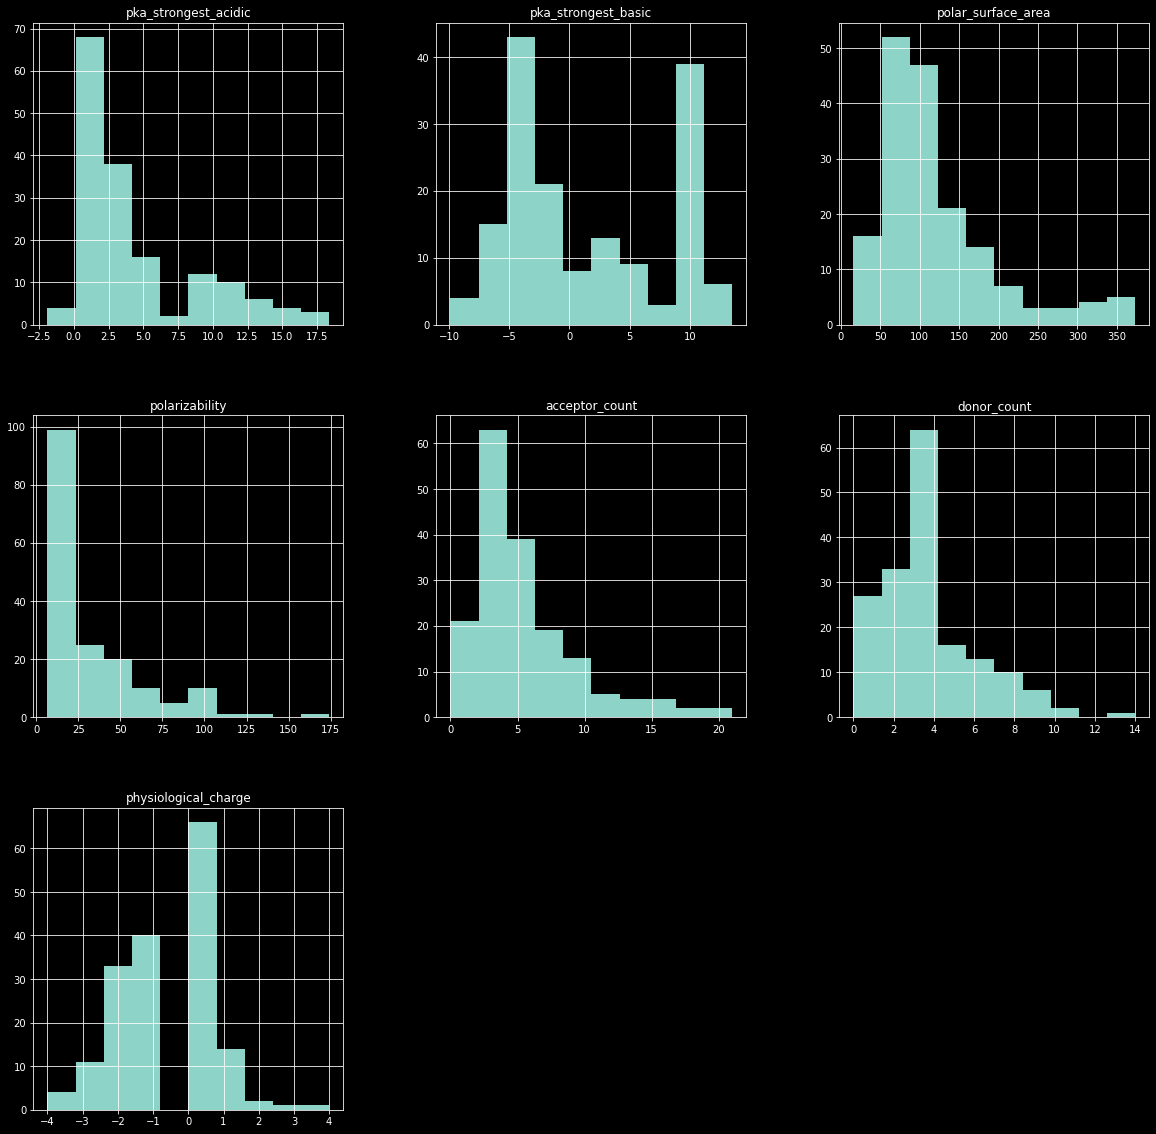

In [5]:
# Plot histograms:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
mol_properties.hist(ax=ax)
fig.savefig(plots_dir / "mol_features.pdf")

In [6]:
# Check for NaN values:
is_null = mol_properties.isnull()
for col in mol_properties_cols:
    print("---")
    print(is_null[col].value_counts())

# FIXME: temporarely set NaN to zero
mol_properties[is_null] = 0.

---
False    163
True       9
Name: pka_strongest_acidic, dtype: int64
---
False    161
True      11
Name: pka_strongest_basic, dtype: int64
---
False    172
Name: polar_surface_area, dtype: int64
---
False    172
Name: polarizability, dtype: int64
---
False    172
Name: acceptor_count, dtype: int64
---
False    172
Name: donor_count, dtype: int64
---
False    172
Name: physiological_charge, dtype: int64


In [7]:
# Perform some basic checks:
assert fingerprints.index.is_unique
assert mol_properties.index.is_unique

In [8]:
print("Number of fingerprints: ", len(fingerprints))
print("Number of mol properties: ", len(mol_properties))

print("Molecules with missing fingerprints: ")
missing_molecules = list(mol_properties[~ mol_properties.index.isin(fingerprints.index)].index)
print(missing_molecules)

# min(fingerprints.iloc[3, ] == fingerprints.iloc[4, ])


Number of fingerprints:  169
Number of mol properties:  172
Molecules with missing fingerprints: 
['Adenosine triphosphate', 'Ribose 5-phosphate', 'Spermine']


Merge fingerprints and properties:

In [9]:
all_mol_features = pd.merge(mol_properties, fingerprints, how="inner", right_index=True, left_index=True)
all_mol_features


,pka_strongest_acidic,pka_strongest_basic,polar_surface_area,polarizability,acceptor_count,donor_count,physiological_charge,1,8,13,...,1977,1991,1992,1995,2001,2004,2018,2034,2038,2044
2-Oxoglutaric acid,2.66,-9.70,91.67,12.17,5.0,2.0,-2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Hydroxyanthranilic acid,1.94,4.82,83.55,14.18,4.0,3.0,-1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3-Hydroxymethylglutaric acid,3.68,-3.00,94.83,14.55,5.0,3.0,-2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Phosphoglyceric acid,1.30,-4.20,124.29,13.29,6.0,4.0,-3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"4,5-Dihydroorotic acid",3.28,-8.20,95.50,13.09,4.0,3.0,-1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthine,7.95,-0.70,86.88,12.70,3.0,3.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
alpha-tocopherol,10.80,-4.90,29.46,55.29,2.0,1.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
cis-Aconitic acid,2.11,0.00,111.90,14.16,6.0,3.0,-3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gamma-Aminobutyric acid,4.53,10.22,63.32,10.62,3.0,2.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Loading intensities

In [10]:
# Intensities:
intensities = pd.read_csv(input_dir / "3june22_ions_no_nl.csv", index_col=0)
intensities.head()

,Matrix short,Polarity,adduct,name_short,detected,spot_intensity
0,9AA,negative,+Cl,2-Oxoglutaric acid,0,0.00000
1,9AA,negative,+Cl,3-Hydroxyanthranilic acid,1,41.60611
2,9AA,negative,+Cl,3-Hydroxymethylglutaric acid,0,0.00000
3,9AA,negative,+Cl,3-Phosphoglyceric acid,0,0.00000
4,9AA,negative,+Cl,"4,5-Dihydroorotic acid",1,160.79555


In [11]:
# Sanity checks:
nb_before = len(intensities.name_short.unique())

# Delete molecules with missing properties:
intensities = intensities[~intensities.name_short.isin(missing_molecules)]
print("{}/{} molecules kept".format(len(intensities.name_short.unique()), nb_before))

169/172 molecules kept


Get statistics about adducts:




/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2987974826.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  std_intesities.hist(column=["detected"], by=['Matrix short', "Polarity"], grid=False, ax=ax)


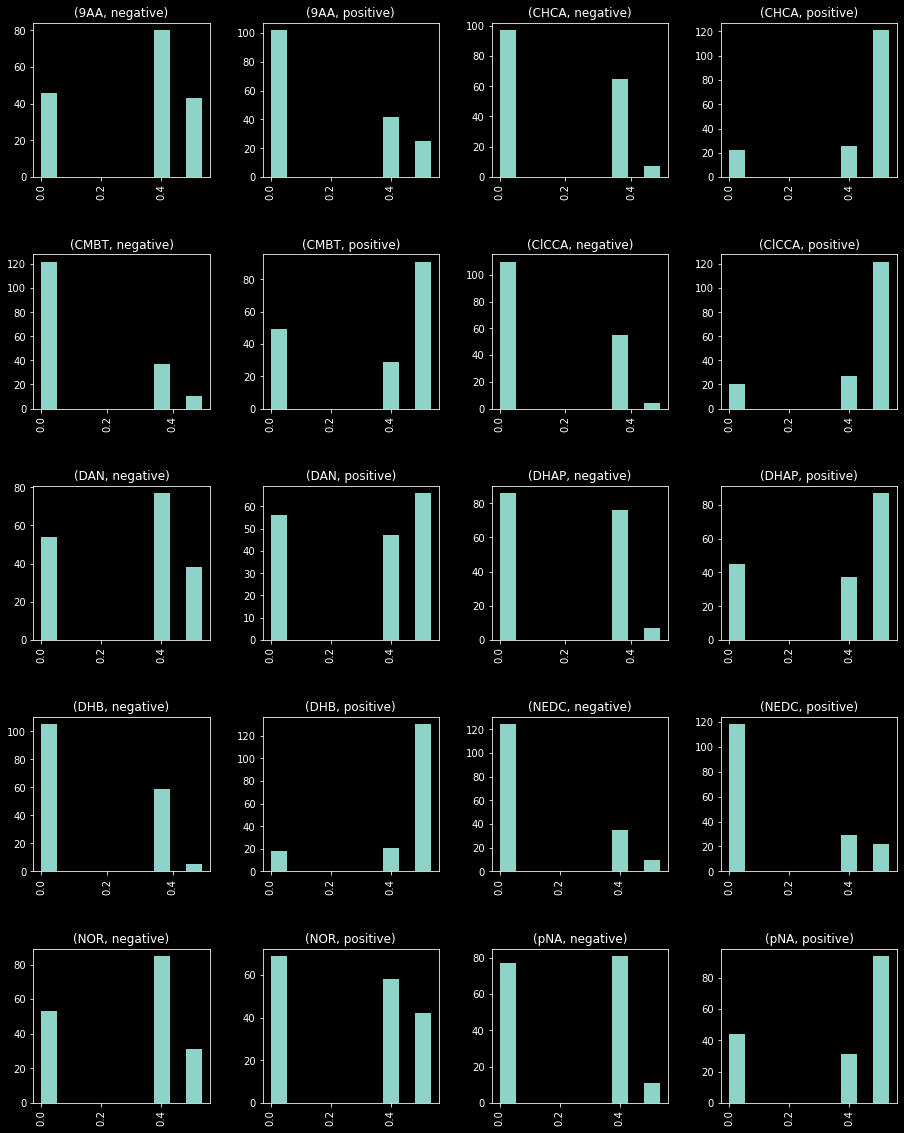

In [12]:
std_intesities = intensities.groupby(['Matrix short', "Polarity", "name_short"], as_index=False).std()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
std_intesities.hist(column=["detected"], by=['Matrix short', "Polarity"], grid=False, ax=ax)
fig.savefig(plots_dir / "std_detected_value.pdf")



In [13]:
# Check if entries with std=0 are always not detected:
std_intesities[std_intesities["detected"] == 0]["spot_intensity"].value_counts()

0.0    1417
Name: spot_intensity, dtype: int64

**Conclusion**: Intensities always vary across adducts (in histograms, std=0 entries were never detected for any adducts)



## Methods for standartization/normalization

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


ss = StandardScaler()
pt = PowerTransformer()

#OPTION 1
features_norm_df = pd.DataFrame(pt.fit_transform(all_mol_features),
                                index = all_mol_features.index,
                                columns = all_mol_features.columns)

# OPTION 2
#features_norm_df = pd.DataFrame(ss.fit_transform(all_mol_features), index = all_mol_features.index, columns = all_mol_features.columns)

# OPTION 3 (Seurat normalization)
#features_norm_df = np.log2((all_mol_features.T / all_mol_features.T.sum().values) * 10000 + 1).T


## Data visualization in UMAP space

### UMAP based on molecule features

In [15]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(features_norm_df[mol_properties_cols])

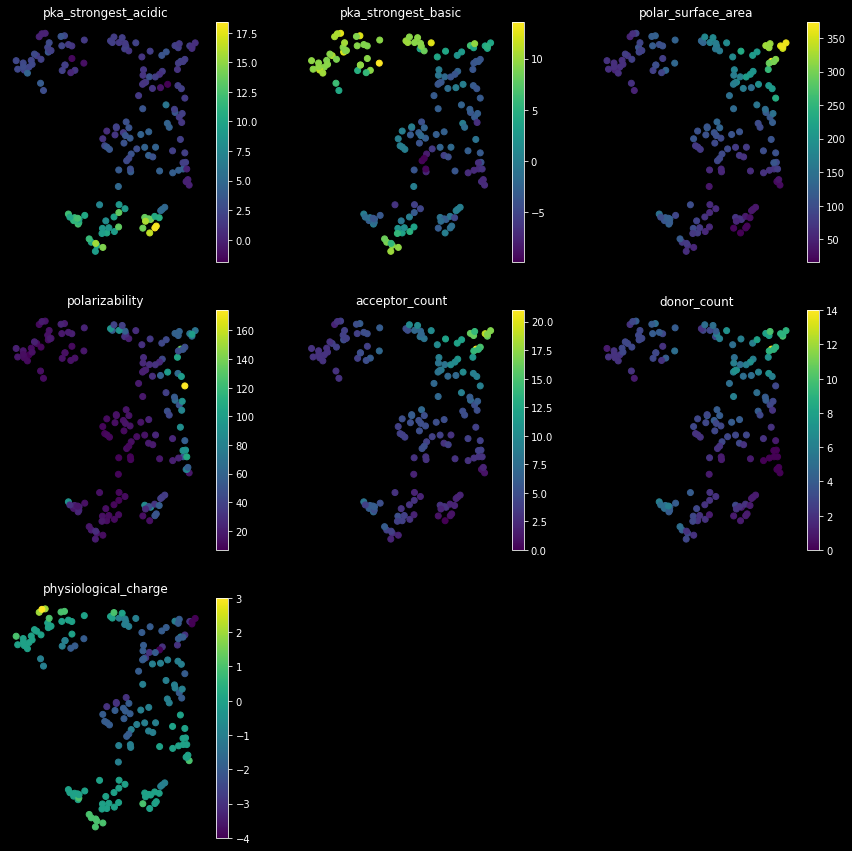

In [16]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = [axes[i,j] for i in range(num_cols) for j in range(num_rows)]
for i, ax in enumerate(axes):
    if i < len(mol_properties_cols):
        sc = ax.scatter(embedding[:, 0], embedding[:, 1], c = all_mol_features[mol_properties_cols[i]],
               # cmap = plt.cm.SOME_CM
               )
        plt.colorbar(sc, ax=ax)
        ax.set_title(mol_properties_cols[i])
    ax.axis('off')

### UMAP based on fingerprints


In [17]:
embedding = reducer.fit_transform(features_norm_df[fingerprints_cols])

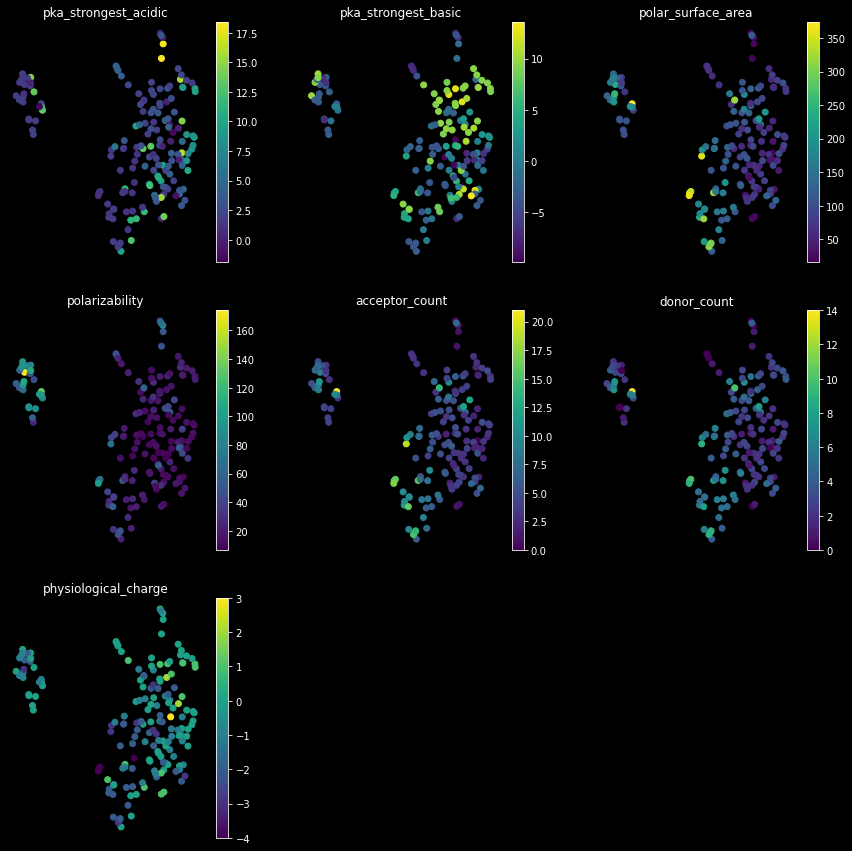

In [18]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = [axes[i,j] for i in range(num_cols) for j in range(num_rows)]
for i, ax in enumerate(axes):
    if i < len(mol_properties_cols):
        sc = ax.scatter(embedding[:, 0], embedding[:, 1], c = all_mol_features[mol_properties_cols[i]],
               # cmap = plt.cm.SOME_CM
               )
        plt.colorbar(sc, ax=ax)
        ax.set_title(mol_properties_cols[i])
    ax.axis('off')


## Create train/val split

First, binarize the molecule features:

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2034404068.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  features_norm_df[mol_properties_cols].hist(ax=ax)


array([[<AxesSubplot:title={'center':'pka_strongest_acidic'}>,
        <AxesSubplot:title={'center':'pka_strongest_basic'}>,
        <AxesSubplot:title={'center':'polar_surface_area'}>],
       [<AxesSubplot:title={'center':'polarizability'}>,
        <AxesSubplot:title={'center':'acceptor_count'}>,
        <AxesSubplot:title={'center':'donor_count'}>],
       [<AxesSubplot:title={'center':'physiological_charge'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

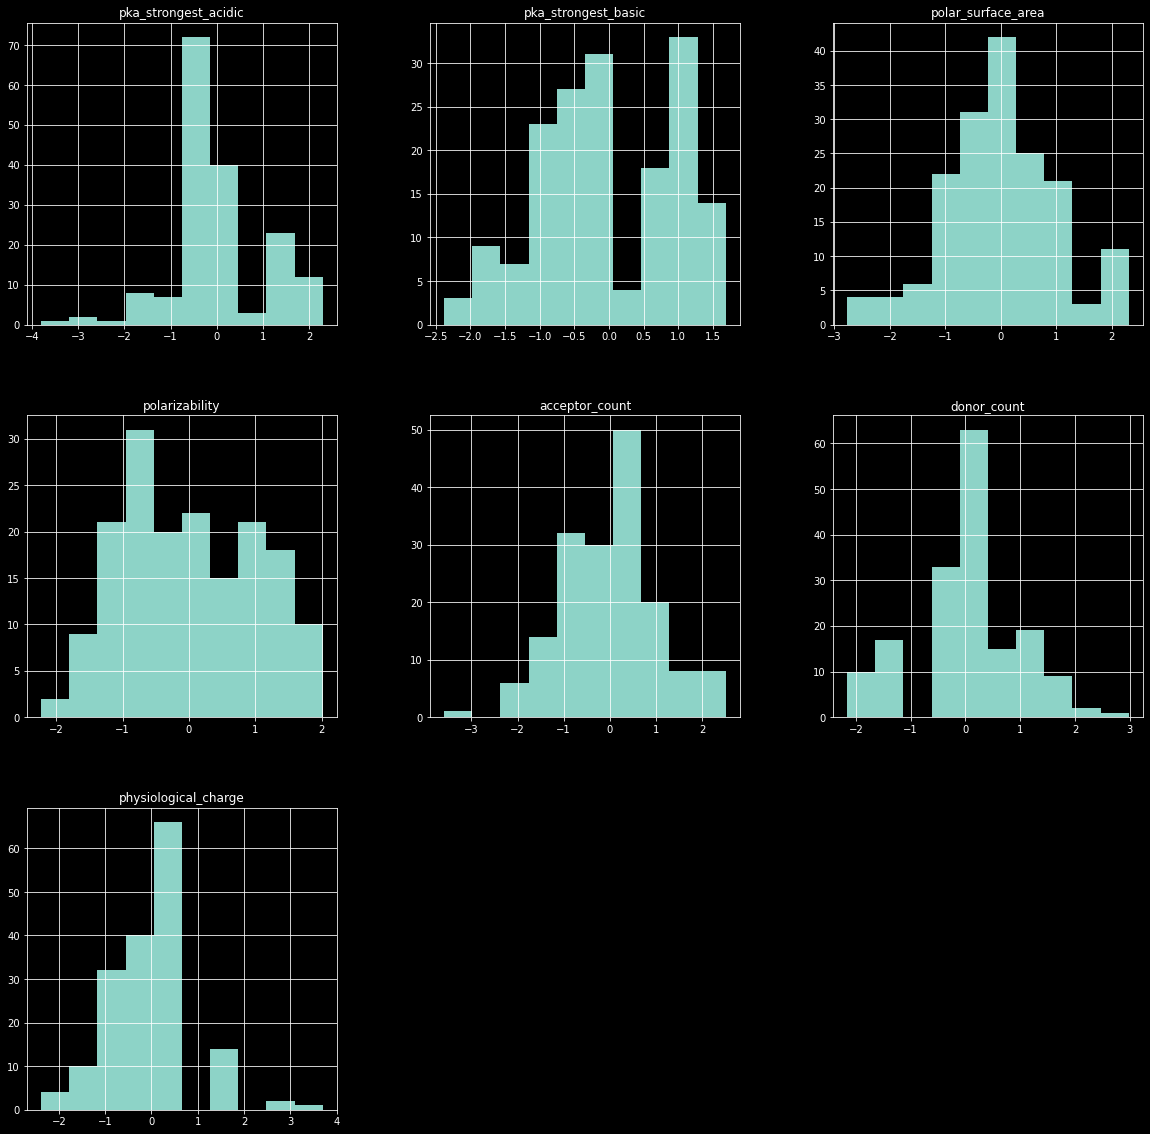

In [19]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
features_norm_df[mol_properties_cols].hist(ax=ax)


Since not all the bins have enough datapoints, use quantiles to define the size of the bins:

In [20]:
# We only select only some features, otherwise there are not enough data in each of the splits:
# selected_stratification_features = [
#     "pka_strongest_basic",
#     "polar_surface_area",
#     "polarizability"
# ]
selected_stratification_features = mol_properties_cols

digitized_mol_properties = pd.DataFrame(index=features_norm_df.index)
for col in selected_stratification_features:
    digitized_mol_properties[col] = pd.qcut(features_norm_df[col], q=2, labels=[1, 2])

digitized_mol_properties.value_counts()
# digitized_mol_properties


pka_strongest_acidic  pka_strongest_basic  polar_surface_area  polarizability  acceptor_count  donor_count  physiological_charge
2                     2                    1                   1               1               1            2                       18
1                     1                    2                   2               2               2            1                       16
                      2                    2                   2               2               2            1                       15
2                     1                    1                   1               1               1            1                       11
                                                               2               1               1            2                       11
1                     2                    1                   1               1               1            2                       10
                      1                    1                 

Now let's get the product of all the classes used for stratification:

In [21]:
intensities.columns


Index(['Matrix short', 'Polarity', 'adduct', 'name_short', 'detected',
       'spot_intensity'],
      dtype='object')

In [22]:
# First, remove adduct information from the intensity dataframe:
matrix_pol_df = intensities.drop(columns=['adduct', 'detected',
       'spot_intensity']).drop_duplicates().set_index('name_short', )

strat_feat = pd.merge(matrix_pol_df, digitized_mol_properties, how="left", left_index=True,
         right_index=True)
strat_feat.value_counts()

strat_feat['combined'] = strat_feat.astype(str).sum(axis=1).astype('category')

# product_strat_feat = pd.DataFrame(index=strat_feat.index)
# strat_feat.columns
# for col in strat_feat.columns:
#     product_strat_feat
#
strat_feat['combined'].value_counts()
# ['Matrix short', 'Polarity']

CHCApositive2211112    18
CMBTpositive2211112    18
DHBpositive2211112     18
DHAPpositive2211112    18
NORnegative2211112     18
                       ..
DANpositive1212112      1
DANpositive1211122      1
DANpositive1121121      1
DANpositive1121111      1
pNApositive2222222      1
Name: combined, Length: 980, dtype: int64

In [23]:
digitized_mol_properties['combined'] = digitized_mol_properties.astype(str).sum(axis=1).astype('category')

digitized_mol_properties['combined'].value_counts()


2211112.0    18
1122221.0    16
1222221.0    15
2111111.0    11
2112112.0    11
1211112.0    10
1112112.0     6
2111112.0     6
2211111.0     5
1221111.0     4
2122221.0     4
1222222.0     3
2121222.0     3
1221112.0     3
2212111.0     3
1122112.0     3
1211111.0     3
2212112.0     2
2121121.0     2
2222221.0     2
2122222.0     2
2112111.0     2
1121221.0     2
1221122.0     2
1122111.0     2
1122211.0     2
1222211.0     2
1222112.0     2
1221221.0     2
2121221.0     2
2222122.0     1
2211122.0     1
2122122.0     1
2221222.0     1
2122121.0     1
1111111.0     1
2121122.0     1
2121111.0     1
2112122.0     1
2112121.0     1
2111122.0     1
1111112.0     1
1221222.0     1
1221211.0     1
1212112.0     1
1211122.0     1
1121121.0     1
1121111.0     1
2222222.0     1
Name: combined, dtype: int64

In [24]:
grouped = intensities.groupby(['Matrix short', "Polarity", "name_short"], as_index=False)

# grouped.groups[('9AA', 'negative', '4,5-Dihydroorotic acid')]

groups = [unused_df for name,unused_df in grouped]
groups
# matrix_pol_df.index.is_unique

[     Matrix short  Polarity adduct          name_short  detected  \
 0             9AA  negative    +Cl  2-Oxoglutaric acid         0   
 172           9AA  negative     +H  2-Oxoglutaric acid         0   
 344           9AA  negative     +K  2-Oxoglutaric acid         0   
 516           9AA  negative    +Na  2-Oxoglutaric acid         0   
 688           9AA  negative     -H  2-Oxoglutaric acid         1   
 860           9AA  negative   [M]+  2-Oxoglutaric acid         0   
 1032          9AA  negative   [M]-  2-Oxoglutaric acid         0   
 
       spot_intensity  
 0              0.000  
 172            0.000  
 344            0.000  
 516            0.000  
 688        65207.863  
 860            0.000  
 1032           0.000  ,
      Matrix short  Polarity adduct                 name_short  detected  \
 1             9AA  negative    +Cl  3-Hydroxyanthranilic acid         1   
 173           9AA  negative     +H  3-Hydroxyanthranilic acid         0   
 345           9AA  negat

Now, compute split only considering molecules (no adducts):

In [25]:
skf = sklearn.model_selection.StratifiedKFold(n_splits=5)
skf.get_n_splits()


5

## Train regression models

In [26]:
from tqdm import notebook

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import LinearRegression

def train_test_regression_models(train_x, test_x, train_y, test_y, model_set=()):
    results_df = pd.DataFrame()
    regressors = {
        'Lin_reg': LinearRegression(),
        'SVR_rbf': SVR(kernel='rbf', C=100, gamma='auto'),
        'SVR_lin': SVR(kernel='linear', C=100, gamma='auto'),
        'SVR_poly': SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1),
        'KNeighbors': KNeighborsRegressor(n_neighbors=5),
        'DecisionTree': DecisionTreeRegressor(max_depth=5),
        'RandomForest': RandomForestRegressor(max_depth=5, n_estimators=10),
        'MLP': MLPRegressor(max_iter=1000),
        'GaussianProcess': GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel())
    }

    if len(model_set)==0: model_set = regressors.keys()

    pbar = notebook.tqdm(model_set, leave=False)
    # for r in model_set:
    for r in pbar:
        pbar.set_postfix({'regressor': r})
        regressor = regressors[r]
        regressor.fit(train_x, train_y)
        y_pred = regressor.predict(test_x)

        loc_res_df = pd.DataFrame({'observed_value': test_y,
                                   'prediction': y_pred,
                                   'regressor': r})
        results_df = pd.concat([results_df, loc_res_df])
    results_df = results_df.reset_index(drop = True)
    return results_df

In [27]:
# Convert adducts to one-hot encoding:
adducts_one_hot = pd.get_dummies(intensities.adduct, prefix='adduct')
adducts_columns = adducts_one_hot.columns
intensities = intensities.merge(right=adducts_one_hot, right_index=True, left_index=True)

In [28]:
adducts_columns.tolist()

['adduct_+Cl',
 'adduct_+H',
 'adduct_+K',
 'adduct_+Na',
 'adduct_-H',
 'adduct_[M]+',
 'adduct_[M]-']

In [29]:

# Cross-validation loop:
regression_results = pd.DataFrame(columns = ['matrix', 'polarity', 'regressor', "observed_value", 'prediction'])
for train_index, test_index in skf.split(digitized_mol_properties.index, digitized_mol_properties['combined']):
    for (matrix, polarity), rows in intensities.groupby(by=["Matrix short", "Polarity"]):
        print(matrix, polarity)
        train_intensities = rows[rows.name_short.isin(digitized_mol_properties.index[train_index])]
        test_intensities = rows[rows.name_short.isin(digitized_mol_properties.index[test_index])]

        train_y = train_intensities.spot_intensity.to_numpy()
        test_y = test_intensities.spot_intensity.to_numpy()

        # print(train_intensities[adducts_columns])
        train_x = \
            pd.merge(train_intensities[adducts_columns.tolist() + ["name_short"]],
                     features_norm_df,
                     how="left",
                     right_index=True,
                     left_on="name_short"
                     ).drop(columns=["name_short"]).to_numpy()
        test_x = \
            pd.merge(test_intensities[adducts_columns.tolist() + ["name_short"]],
                     features_norm_df,
                     how="left",
                     right_index=True,
                     left_on="name_short"
                     ).drop(columns=["name_short"]).to_numpy()

        results_df = train_test_regression_models(train_x, test_x, train_y, test_y)
        # results_df = train_test_regression_models(test_x, test_x, test_y, test_y)

        # # TODO: add columns for matrix and polaritu and append
        results_df["matrix"] = matrix
        results_df["polarity"] = polarity
        regression_results = pd.concat([regression_results, results_df])


9AA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA negative


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA negative


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA negative


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA positive


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT positive


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA negative


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN negative


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

9AA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CHCA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

CMBT positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

ClCCA positive


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DAN positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHAP positive


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

DHB positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NEDC positive


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

NOR positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA negative


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

pNA positive


/Users/alberto-mac/miniconda3/envs/outerSpacem/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)


  0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(loc_res_df)
/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_9528/2457236671.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

In [34]:
# regression_results = regression_results.append(results_df)
regression_results.to_csv("/Users/alb983erto-mac/EMBL_repos/spotting-project-regression/results/regr_results.csv")

### Evaluate results

In [ ]:
import scipy.stats
from sklearn.metrics import mean_squared_error

# compute Spearman's correlation and mean squared error for
regression_metrics = pd.DataFrame(columns = ['matrix', 'polarity', 'regressor', "Spearman's R", 'pval', 'RMSE'])
counter = 0
for (matrix, polarity, regressor), rows in regression_results.groupby(['matrix', 'polarity', 'regressor']):
    spearman = scipy.stats.spearmanr(rows.observed_value, rows.prediction)
    mse = mean_squared_error(rows.observed_value, rows.prediction, squared = False)
    regression_metrics.loc[counter] = [matrix, polarity, regressor, spearman[0], spearman[1], mse]

# select best regressor for each matrix/polarity combination
for (matrix, polarity), rows in regression_results.groupby(['matrix', 'polarity']):
    best_reg = rows[rows["RMSE"] == rows["RMSE"].min()]
    print(best_reg)

# check if the best matrix is selected for each ion with a selected regressor
selected_regressor = "selected regressor name"
accuracy = 0
for (molecule, adduct), rows in regression_results[regression_results.regressor = selected_regressor].groupby(['molecule', 'adduct']):
    best_observed = rows[rows["observed_value"] == rows["observed_value"].max()]['matrix']
    best_predicted = rows[rows["prediction"] == rows["prediction"].max()]['matrix']
    if best_observed == best_predicted: accuracy += 1
accuracy = accuracy / regression_results[regression_results.regressor = selected_regressor][['molecule', 'adduct']].drop_duplicates().shape[0]
print('Accuracy of top matrix/polarity prediction =', accuracy)
